# Training Models

## Linear Regression in Normal Equation

$\hat{y} = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n$

$\hat{y} = h_\theta(\mathbf{x}) = \theta^T \cdot \mathbf{x}$

$MSE(\mathbf{X}, h_\theta) = \dfrac{1}{m}\sum_{i=1}^{m}(\theta^T\cdot\mathbf{x}^{(i)} - y^{(i)})^2$

$\hat{\theta} = (\mathbf{X}^T\cdot\mathbf{X})^{-1}\cdot\mathbf{X}^T\cdot\mathbf{y}$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
np.random.seed(42)

In [3]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

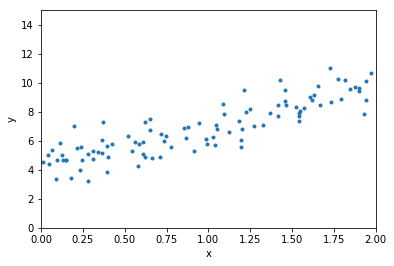

In [4]:
plt.plot(X, y, '.')
plt.xlabel("x")
plt.ylabel("y")
plt.axis([0, 2, 0, 15]);

In [5]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each sample
X_b[:3]

array([[1.        , 0.74908024],
       [1.        , 1.90142861],
       [1.        , 1.46398788]])

In [6]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.21509616],
       [2.77011339]])

Our original function is:

$y = 4 + 3x_1 + noise$

but we've got 3.92 and 3.12 as result - it's close enough but it's not exactly the same because of the noise

In [7]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

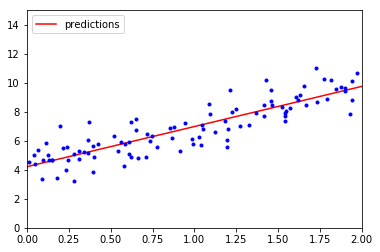

In [8]:
plt.plot(X_new, y_predict, "r-", label='predictions')
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.legend(loc="upper left");

The same in scikit-learn:

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [11]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

## Batch Gradient Descent

$\dfrac{\partial}{\partial{\theta_j}}MSE(\theta) = \dfrac{2}{m}\sum_{i=1}^{m}(\theta^T\cdot\mathbf{x}^{(i)} - y^{(i)})x_j^{(i)}$

$\nabla_{\theta}MSE(\theta) = \left\lgroup{\dfrac{\partial}{\partial{\theta_0}}MSE(\theta)\\\dfrac{\partial}{\partial{\theta_1}}MSE(\theta)\\\vdots\\\dfrac{\partial}{\partial{\theta_n}}MSE(\theta)}\right\rgroup = \dfrac{2}{m}\mathbf{X}^T\cdot(\mathbf{X}\cdot\theta-\mathbf{y})$

$\theta^{(next{\space}step)} = \theta - \eta\nabla_{\theta}MSE(\theta)$

In [12]:
eta = 0.1    # learning speed
n_iterations = 1000
m = 100  # number of samples

theta = np.random.randn(2, 1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [13]:
theta

array([[4.21509616],
       [2.77011339]])

In [14]:
theta_path_bgs = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10 or iteration == 999:
            y_predict = X_new_b.dot(theta)
            if iteration == 0:
                style = 'r--'
            elif iteration == 999:
                style = 'g-'
            else:
                style = 'b-'
            # style = 'b-' if iteration > 0 else 'r--'
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$")
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta$ = {}".format(eta))

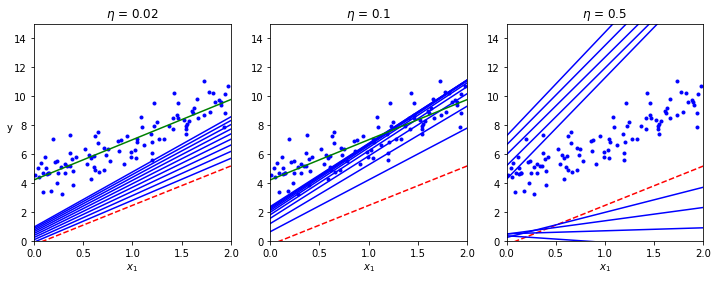

In [15]:
theta = np.random.randn(2, 1)

plt.figure(figsize=(12, 4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("y", rotation=0)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgs)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

## Stochastic Gradient Descent

In [16]:
def plot_stoch_gradient_desc(theta, style):
    y_predict = X_new_b.dot(theta)
    plt.plot(X_new, y_predict, style)

Final theta:
[[4.18228368]
 [2.72737073]]


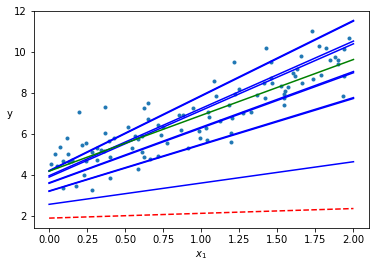

In [17]:
plt.plot(X, y, '.')
plt.xlabel(r"$x_1$")
plt.ylabel("y", rotation=0)

n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        if i < 10 and epoch == 0:
            style = 'b-' if i > 0 else 'r--'
            plot_stoch_gradient_desc(theta, style)

plot_stoch_gradient_desc(theta, 'g-')

print("Final theta:\n{}".format(theta))

Almost the same by Scikit-Learn:

In [18]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())  # X.shape = (100, 1), y.shape = (100, 1) -> (100)

sgd_reg.intercept_, sgd_reg.coef_

(array([4.25873097]), array([2.81460429]))

In [61]:
def batch_gradient_descent(theta):
    theta_0 = []
    theta_1 = []
    
    eta = 0.1    # learning speed
    n_iterations = 1000
    m = 100  # number of samples

    for iteration in range(n_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        theta_0.append(theta.ravel()[0])
        theta_1.append(theta.ravel()[1])
    return theta_0, theta_1
        
def stoch_gradient_descent(theta):
    theta_0 = []
    theta_1 = []
    
    n_epochs = 50
    t0, t1 = 5, 50

    def learning_schedule(t):
        return t0 / (t + t1)

    for epoch in range(n_epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X_b[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            eta = learning_schedule(epoch * m + i)
            theta = theta - eta * gradients
            theta_0.append(theta.ravel()[0])
            theta_1.append(theta.ravel()[1])
    return theta_0, theta_1

Initial theta_0 = -1.3958840933534262
Initial theta_1 = -0.8989148668676311


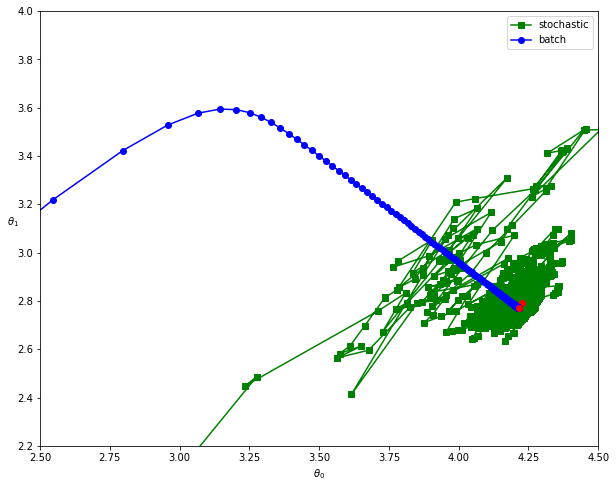

In [93]:
plt.figure(figsize=(10, 8))
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$", rotation=0)
plt.axis([2.5, 4.5, 2.2, 4.0])

theta = np.random.randn(2, 1)  # random initialization
print("Initial theta_0 = {}\nInitial theta_1 = {}".format(theta.ravel()[0], theta.ravel()[1]))
# plt.plot(theta[0], theta[1], 'or')

for model, style, label in zip([stoch_gradient_descent, batch_gradient_descent], 
                               ['gs-', 'bo-'],
                               ['stochastic', 'batch']):
    theta_0, theta_1 = model(theta)
    plt.plot(theta_0, theta_1, style, label=label)
    plt.plot(theta_0[-1], theta_1[-1], 'ro')
plt.legend(loc="best");

## Polynomial Regression

In [120]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

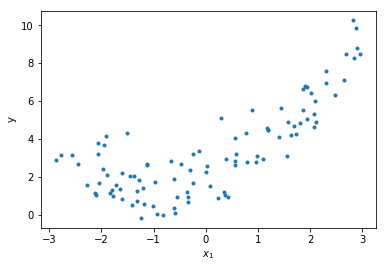

In [109]:
plt.plot(X, y, '.')
plt.xlabel(r"$x_1$")
plt.ylabel("y");

In [99]:
from sklearn.preprocessing import PolynomialFeatures

In [121]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
poly = poly_features.fit(X)
X_poly = poly_features.fit_transform(X)
poly.get_feature_names()

['x0', 'x0^2']

In [122]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.12893953]), array([[0.92440579, 0.41549026]]))

Our original function:

$y=0.5x_1^2+1.0x_1+2.0+noise$

Our predicted function:

$y=0.41x_1^2+0.92x_1+2.12$

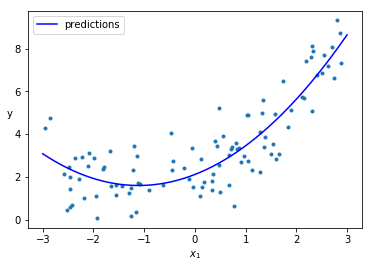

In [144]:
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
line_poly = poly_features.fit_transform(line)

plt.plot(X, y, '.')
plt.plot(line, lin_reg.predict(line_poly), 'b-', label='predictions')
plt.xlabel(r"$x_1$")
plt.ylabel("y", rotation=0)
plt.legend();